<a href="https://www.kaggle.com/code/danielprazeres/projeto-final-ebac?scriptVersionId=216262685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1\. Exploração de Dados**

Vamos explorar dados de clientes de uma instituição financeira, que estão no formato CSV /content/acd2b94f1c.csv. Os dados contêm diversas informações sobre os clientes, como idade, escolaridade, estado civil, e movimentação financeira. Em especial, estamos interessados em explicar a coluna default, que indica se um cliente é adimplente (`default = 0`) ou inadimplente (`default = 1`). Nosso objetivo é entender os motivos que levam um cliente a se tornar inadimplente com base no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

> O atributo de interesse (default) é conhecido como variável resposta ou variável dependente, enquanto os demais atributos que ajudam a explicá-lo (como idade, salário, escolaridade, etc.) são conhecidos como variáveis explicativas, variáveis independentes ou até variáveis preditoras.



| Coluna                  | Descrição                                                                 |
|-------------------------|---------------------------------------------------------------------------|
| id                      | Identificador único do cliente.                                          |
| default                 | Indica se o cliente é adimplente (0) ou inadimplente (1).                |
| idade                   | Idade do cliente.                                                       |
| sexo                    | Gênero do cliente (M = Masculino, F = Feminino).                        |
| dependentes             | Quantidade de dependentes declarados pelo cliente.                      |
| escolaridade            | Nível de escolaridade do cliente.                                       |
| estado_civil            | Estado civil do cliente.                                                |
| salario_anual           | Faixa salarial anual declarada pelo cliente.                            |
| tipo_cartao             | Categoria do cartão de crédito do cliente (blue, silver, gold, platinum).|
| meses_de_relacionamento | Tempo, em meses, desde a abertura da conta.                             |
| qtd_produtos            | Quantidade de produtos ou serviços contratados pelo cliente.            |
| iteracoes_12m           | Quantidade de interações do cliente com a instituição nos últimos 12 meses. |
| meses_inativo_12m       | Quantidade de meses em que o cliente esteve inativo nos últimos 12 meses. |
| limite_credito          | Valor do limite de crédito do cliente.                                  |
| valor_transacoes_12m    | Soma total do valor das transações realizadas no último ano.            |
| qtd_transacoes_12m      | Quantidade total de transações realizadas pelo cliente no último ano.   |

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/acd2b94f1c-csv/acd2b94f1c.csv', na_values=['na', 'NA', 'NaN'])

In [3]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


## **1.1\. **Estrutura**

In [4]:
df.shape

(10127, 16)

In [5]:
df[df['default'] == 0].shape

(8500, 16)

In [6]:
df[df['default'] == 1].shape

(1627, 16)

In [7]:
qtd_total, _ = df.shape
qtd_adimplentes = df[df['default'] == 0].shape[0]
qtd_inadimplentes = df[df['default'] == 1].shape[0]

In [8]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


## **1.2\. Schema**

In [9]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28




*   Colunas e seus respectivos tipos de dados


In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object



*   Atributos **categóricos**

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **1.3. Dados faltantes**

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [13]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28




*   Podemos verificar quais colunas possuem dados faltantes.



In [14]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [15]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [16]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [17]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [18]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 2\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **2.1. Correção de schema**

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [21]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [22]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [23]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [24]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [25]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **2.2. Remoção de dados faltantes**

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [26]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [27]:
df.shape

(7081, 16)

In [28]:
df[df['default'] == 0].shape

(5968, 16)

In [29]:
df[df['default'] == 1].shape

(1113, 16)

In [30]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [31]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## **2.3\. Corrigindo colunas monetárias**

In [32]:
fn = lambda valor: float(str(valor).replace('.', '').replace(',', '.'))
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [33]:
# Visualizar valores únicos da coluna 'limite_credito'
print(df['limite_credito'].unique())

# Ou, para uma melhor visualização com a lista ordenada
print(sorted(df['limite_credito'].drop_duplicates()))

# Visualizar valores únicos da coluna 'valor_transacoes_12m'
print(df['valor_transacoes_12m'].unique())

# Ou, ordenados para mais clareza
print(sorted(df['valor_transacoes_12m'].drop_duplicates()))

[1269151.  825696.  341856. ...  400391.  540916.  103888.]
[14380.0, 14381.0, 14382.0, 14383.0, 14384.0, 14385.0, 14386.0, 14387.0, 14388.0, 14389.0, 14390.0, 14492.0, 14524.0, 14601.0, 14604.0, 14768.0, 15034.0, 15199.0, 15391.0, 15525.0, 15584.0, 15629.0, 15764.0, 15785.0, 15856.0, 16060.0, 16061.0, 16145.0, 16204.0, 16511.0, 16566.0, 16596.0, 16845.0, 16861.0, 16941.0, 17055.0, 17146.0, 17210.0, 17229.0, 17415.0, 17524.0, 17542.0, 17590.0, 17809.0, 17814.0, 17918.0, 17957.0, 18186.0, 18305.0, 18351.0, 18385.0, 18448.0, 18520.0, 18547.0, 18626.0, 18645.0, 18796.0, 19092.0, 19124.0, 19157.0, 19186.0, 19248.0, 19269.0, 19278.0, 19317.0, 19349.0, 19363.0, 19435.0, 19522.0, 19564.0, 19687.0, 19731.0, 19814.0, 20054.0, 20361.0, 20414.0, 20426.0, 20429.0, 20439.0, 20631.0, 20670.0, 20677.0, 20700.0, 20741.0, 20821.0, 20844.0, 20858.0, 20925.0, 21116.0, 21227.0, 21357.0, 21406.0, 21437.0, 21446.0, 21455.0, 21710.0, 21772.0, 21815.0, 21823.0, 21857.0, 21858.0, 21862.0, 21903.0, 22061.0, 221

## 3\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [35]:
df_adimplente = df[df['default'] == 0]

In [36]:
df_inadimplente = df[df['default'] == 1]

In [37]:
# Visualizar valores únicos da coluna 'limite_credito'
print(df['limite_credito'].unique())

[1269151.  825696.  341856. ...  400391.  540916.  103888.]


Proporção de Adimplentes e Inadimplentes

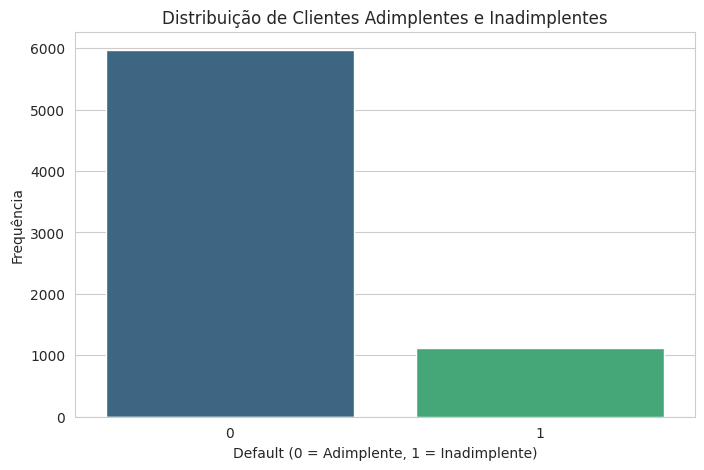

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='default', hue='default', palette='viridis', dodge=False)
plt.title('Distribuição de Clientes Adimplentes e Inadimplentes')
plt.xlabel('Default (0 = Adimplente, 1 = Inadimplente)')
plt.ylabel('Frequência')
plt.legend([], [], frameon=False)
plt.show()

Estado Civil e Default

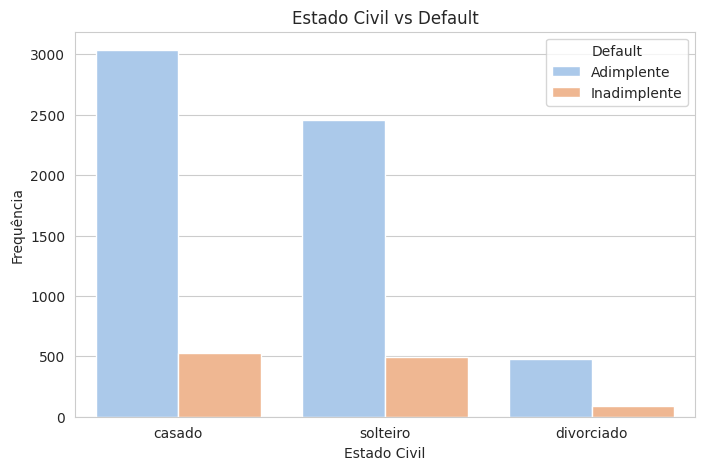

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='estado_civil', hue='default', palette='pastel')
plt.title('Estado Civil vs Default')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.legend(title='Default', labels=['Adimplente', 'Inadimplente'])
plt.show()

Escolaridade e Default

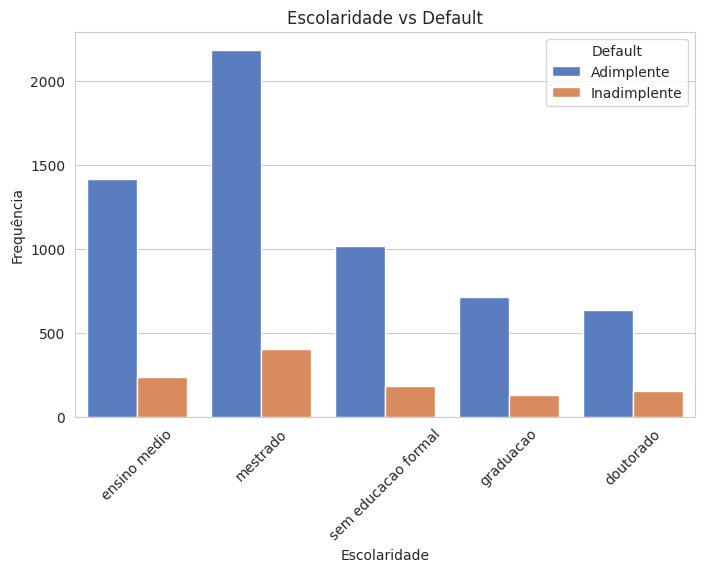

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='escolaridade', hue='default', palette='muted')
plt.title('Escolaridade vs Default')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.legend(title='Default', labels=['Adimplente', 'Inadimplente'])
plt.xticks(rotation=45)
plt.show()

Salário Anual e Default

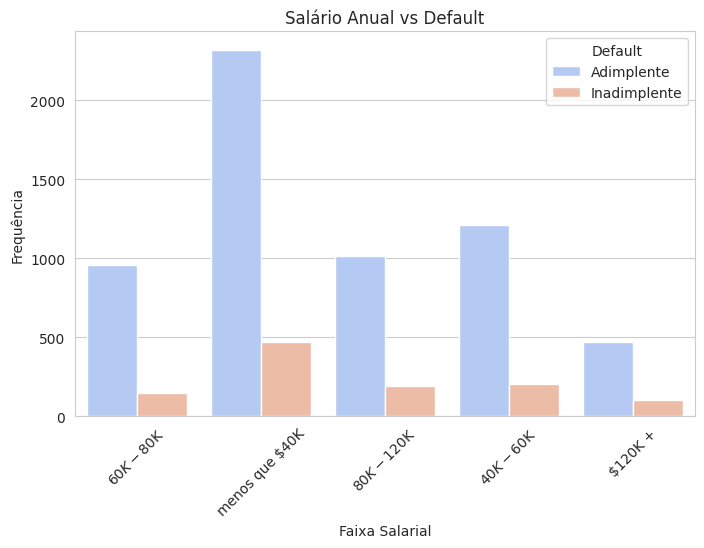

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salario_anual', hue='default', palette='coolwarm')
plt.title('Salário Anual vs Default')
plt.xlabel('Faixa Salarial')
plt.ylabel('Frequência')
plt.legend(title='Default', labels=['Adimplente', 'Inadimplente'])
plt.xticks(rotation=45)
plt.show()

Quantidade de Produtos e Default

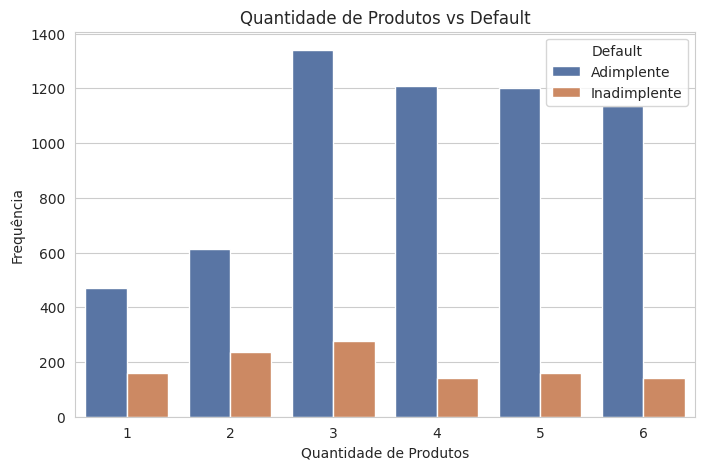

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='qtd_produtos', hue='default', palette='deep')
plt.title('Quantidade de Produtos vs Default')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Frequência')
plt.legend(title='Default', labels=['Adimplente', 'Inadimplente'])
plt.show()

Valor vs Quantidade de Transações

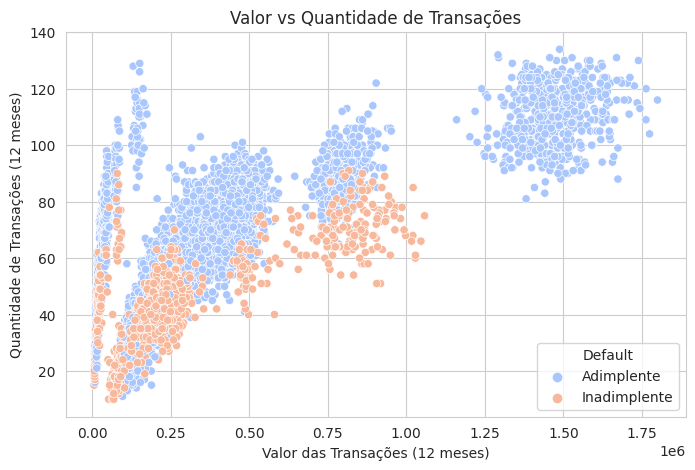

In [43]:
plt.figure(figsize=(8, 5))
scatter_plot = sns.scatterplot(data=df, x='valor_transacoes_12m', y='qtd_transacoes_12m', hue='default', palette='coolwarm')
plt.title('Valor vs Quantidade de Transações')
plt.xlabel('Valor das Transações (12 meses)')
plt.ylabel('Quantidade de Transações (12 meses)')
handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Adimplente', 'Inadimplente'], title='Default')
plt.show()

In [44]:
# Proporção de Clientes Adimplentes e Inadimplentes
qtd_total = len(df)
qtd_adimplentes = len(df[df['default'] == 0])
qtd_inadimplentes = len(df[df['default'] == 1])

print(f"Clientes Adimplentes: {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Clientes Inadimplentes: {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

# Estado Civil e Default
estado_civil_pct = df.groupby(['estado_civil', 'default']).size().unstack().apply(lambda x: 100 * x / x.sum(), axis=1)
print("Proporção de Default por Estado Civil:")
print(estado_civil_pct)

# Escolaridade e Default
escolaridade_pct = df.groupby(['escolaridade', 'default']).size().unstack().apply(lambda x: 100 * x / x.sum(), axis=1)
print("Proporção de Default por Escolaridade:")
print(escolaridade_pct)

# Salário Anual e Default
salario_anual_pct = df.groupby(['salario_anual', 'default']).size().unstack().apply(lambda x: 100 * x / x.sum(), axis=1)
print("Proporção de Default por Salário Anual:")
print(salario_anual_pct)

# Quantidade de Produtos e Default
qtd_produtos_pct = df.groupby(['qtd_produtos', 'default']).size().unstack().apply(lambda x: 100 * x / x.sum(), axis=1)
print("Proporção de Default por Quantidade de Produtos:")
print(qtd_produtos_pct)

# Valor vs Quantidade de Transações
mean_values = df.groupby('default')[['valor_transacoes_12m', 'qtd_transacoes_12m']].mean()
print("Média de Valor e Quantidade de Transações por Default:")
print(mean_values)

# Meses de Relacionamento e Default
relacionamento_pct = df.groupby('default')['meses_de_relacionamento'].mean()
print("Média de Meses de Relacionamento por Default:")
print(relacionamento_pct)

Clientes Adimplentes: 84.28%
Clientes Inadimplentes: 15.72%
Proporção de Default por Estado Civil:
default               0          1
estado_civil                      
casado        85.157127  14.842873
divorciado    83.831283  16.168717
solteiro      83.310719  16.689281
Proporção de Default por Escolaridade:
default                      0          1
escolaridade                             
doutorado            80.735108  19.264892
ensino medio         85.662432  14.337568
graduacao            84.360190  15.639810
mestrado             84.330374  15.669626
sem educacao formal  84.551495  15.448505
Proporção de Default por Salário Anual:
default                 0          1
salario_anual                       
$120K +         82.167832  17.832168
$40K - $60K     85.552408  14.447592
$60K - $80K     86.854034  13.145966
$80K - $120K    84.276206  15.723794
menos que $40K  83.058739  16.941261
Proporção de Default por Quantidade de Produtos:
default               0          1
qtd_produt

## **4\. Storytelling**

**Resumo dos Insights Gerados com Percentuais**

1. Proporção de Clientes Adimplentes e Inadimplentes
	*	Adimplentes: 84.28%
	*	Inadimplentes: 15.72%
	*	Insight: A maior parte dos clientes é adimplente, mas há uma parcela relevante de inadimplentes (quase 16%).

2. Estado Civil e Inadimplência
	*	Casados: 14.84% de inadimplência.
	*	Divorciados: 16.17% de inadimplência.
	*	Solteiros: 16.69% de inadimplência.
	*	Insight: Solteiros e divorciados apresentam taxas de inadimplência ligeiramente mais altas do que clientes casados.

3. Escolaridade e Inadimplência
	*	Menor inadimplência: Ensino Médio (14.34%) e Graduação (15.64%).
	*	Maior inadimplência: Doutorado (19.26%).
	*	Insight: A inadimplência é maior entre clientes com doutorado, o que pode ser influenciado pelo menor volume de clientes nesse grupo. O Ensino Médio apresenta a menor taxa de inadimplência.

4. Salário Anual e Inadimplência
	*	Menor inadimplência: Faixa de $60K–$80K (13.14%).
	*	Maior inadimplência: Menos de $40K (16.94%) e $120K+ (17.83%).
	*	Insight: Clientes de renda muito baixa e muito alta apresentam maior inadimplência. A faixa intermediária ($60K–$80K) é a mais estável.

5. Quantidade de Produtos e Inadimplência
	*	Menor inadimplência: 4 produtos (10.44%) e 6 produtos (11.05%).
	*	Maior inadimplência: 1 produto (25.20%) e 2 produtos (27.83%).
	*	Insight: Clientes com mais produtos contratados têm maior estabilidade financeira. Aqueles com apenas 1 ou 2 produtos são mais arriscados.

6. Valor e Quantidade de Transações
	*	Adimplentes: Média de $425,794 em transações e 68 transações por ano.
	*	Inadimplentes: Média de $283,625 em transações e 44 transações por ano.
	*	Insight: Clientes inadimplentes realizam menos transações e movimentam menores valores.

7. Meses de Relacionamento e Inadimplência
	*	Adimplentes: Média de 35.95 meses de relacionamento.
	*	Inadimplentes: Média de 36.15 meses de relacionamento.
	*	Insight: O tempo de relacionamento não parece ser um fator significativo para prever inadimplência.